In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [3]:
model = load_model("/content/drive/MyDrive/CS338 - Nhận dạng/Seminar/Code/Denoising Autoencoder/dirty_document/dirty_image_model.h5")

In [4]:
img_test_path = "/content/drive/MyDrive/CS338 - Nhận dạng/Seminar/Code/Denoising Autoencoder/dirty_document/real_img"

In [5]:
input_shape=(420,540,1)

In [6]:
def process_image(path):
    img = cv2.imread(path)
    img = np.asarray(img, dtype="float32")
    img = cv2.resize(img, (input_shape[1], input_shape[0]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, input_shape)
    
    return img

In [24]:
test = []
for f in sorted(os.listdir(img_test_path)):
    test.append(process_image(os.path.join(img_test_path, f)))
X_test = np.asarray(test)

In [25]:
# Chon random 5 anh de khu nhieu
s_id = 0
e_id = 8

In [26]:
pred_images = model.predict(X_test, batch_size=8)

1/1 [==============================] - 47s 47s/step


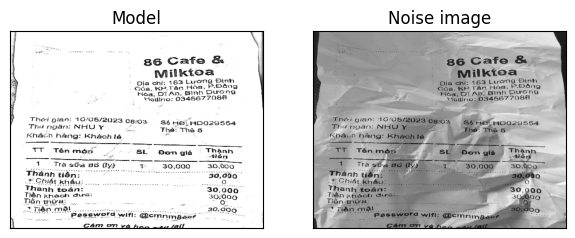

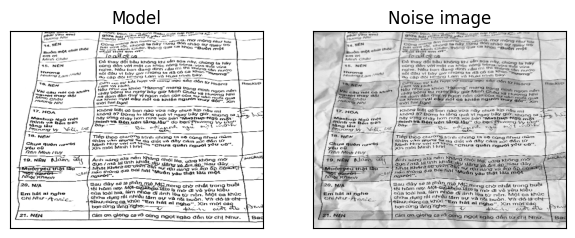

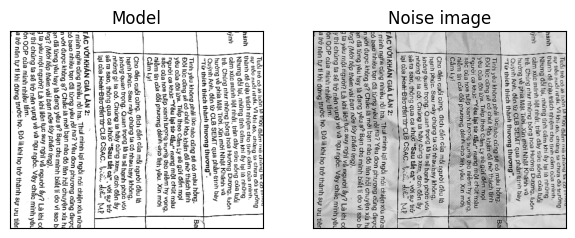

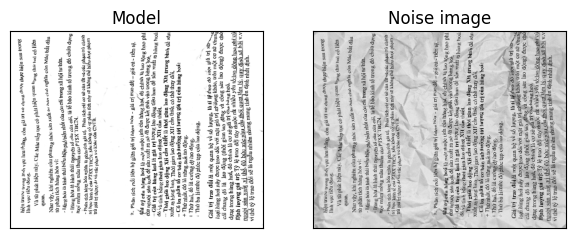

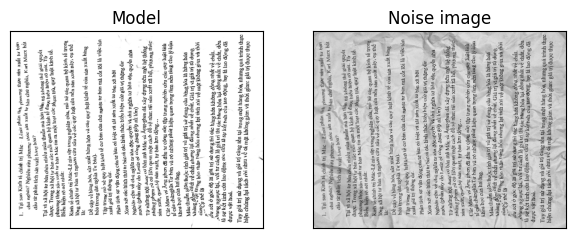

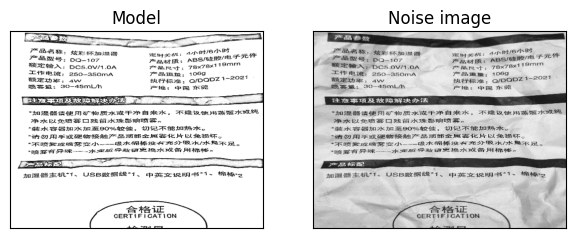

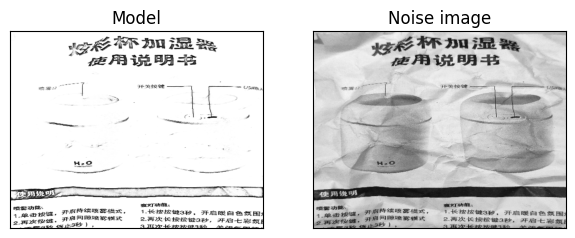

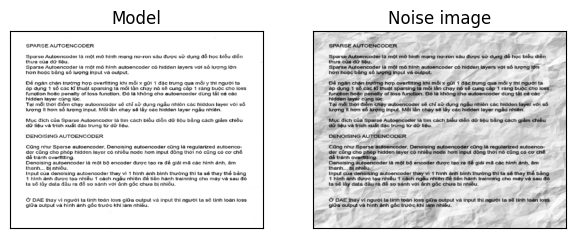

In [27]:
for i in range(s_id, e_id):
    plt.figure(figsize=(15,25))
    plt.subplot(141)
    plt.imshow(pred_images[i-s_id], cmap='gray')
    plt.title('Model')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(142)
    plt.imshow(X_test[i], cmap='gray')
    plt.title('Noise image')
    plt.xticks([])
    plt.yticks([])
    

    plt.show()

## Camera Capture
Using a webcam to capture images for processing on the runtime.

In [54]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [62]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [57]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


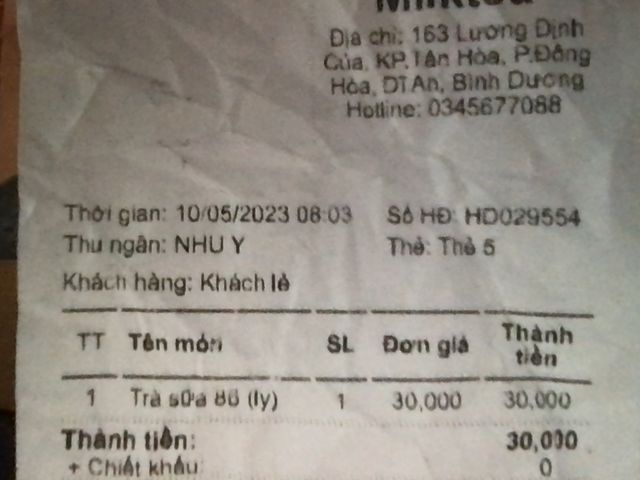

In [75]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [76]:
real_test = []
real_test.append(process_image('/content/photo.jpg'))
X_test = np.asarray(real_test)

In [77]:
pred_images = model.predict(X_test, batch_size=8)

1/1 [==============================] - 7s 7s/step


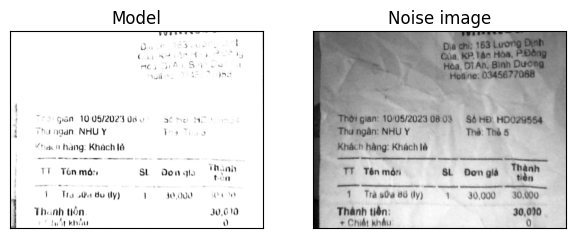

In [78]:
for i in range(0,1):
    plt.figure(figsize=(15,25))
    plt.subplot(141)
    plt.imshow(pred_images[i-s_id], cmap='gray')
    plt.title('Model')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(142)
    plt.imshow(X_test[i], cmap='gray')
    plt.title('Noise image')
    plt.xticks([])
    plt.yticks([])
    
